In [1]:
import gymnasium as gym
from src.basic_agent import BasicAgent
import matplotlib.pyplot as plt
import numpy as np

In [2]:

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()
weak_agent = BasicAgent(print_mode=True)
action = weak_agent.start_step()
total_steps = 1000
for _ in range(total_steps):
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        reward = weak_agent.terminal_step(observation, reward)
        observation, info = env.reset()
        action = weak_agent.start_step()
    else:
        action, reward = weak_agent.step(observation, reward)
env.close()

Safe: vy=-0.04590567201375961, l1=1.0, l2=1.0
x=-0.4507814347743988
Crash: vy=0.17738556861877441, l1=0.0, l2=1.0
hs_1l: vy=-0.3873087763786316, l1=1.0, l2=0.0
hs_1l: vy=-0.37138044834136963, l1=1.0, l2=0.0
ls_1l: vy=-0.1424354910850525, l1=0.0, l2=1.0
Crash: vy=-1.2830040454864502, l1=0.0, l2=0.0
Crash: vy=-0.9863433241844177, l1=0.0, l2=1.0
hs_1l: vy=-0.23055420815944672, l1=0.0, l2=1.0


Percent Done: 5.0%
Percent Done: 10.0%
Percent Done: 15.0%
Percent Done: 20.0%
Percent Done: 25.0%
Percent Done: 30.0%
Percent Done: 35.0%
Percent Done: 40.0%
Percent Done: 45.0%
Percent Done: 50.0%
Percent Done: 55.0%
Percent Done: 60.0%
Percent Done: 65.0%
Percent Done: 70.0%
Percent Done: 75.0%
Percent Done: 80.0%
Percent Done: 85.0%
Percent Done: 90.0%
Percent Done: 95.0%
Percent Done: 100.0%


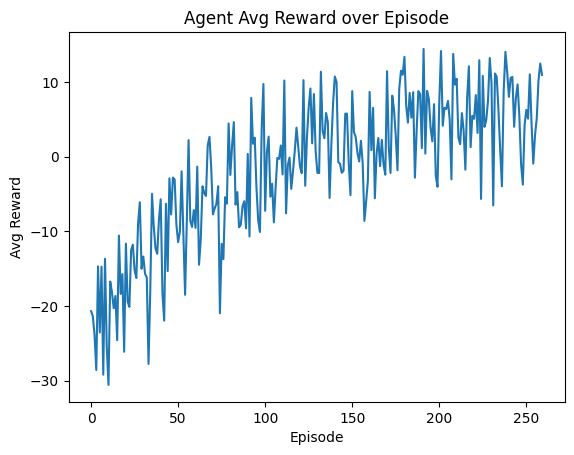

In [2]:

env = gym.make("LunarLander-v2")
observation, info = env.reset()
agent1 = BasicAgent(print_mode=False)
action = agent1.start_step()
reward_hist = []
batch_hist = []
total_reward = 0
batch_reward = 0
ep_steps = 0
batch = 50
total_steps = 1500000
print_fac = 20
print_interval = int(total_steps/print_fac)
for _ in range(total_steps):
    if (_+1) % print_interval == 0:
        percent_done = (_+1)/total_steps*100
        print(f"Percent Done: {percent_done:.1f}%")
    observation, reward, terminated, truncated, info = env.step(action)
    ep_steps += 1
    if terminated or truncated:
        reward = agent1.terminal_step(observation, reward)
        total_reward += reward
        reward_hist.append(total_reward/ep_steps)
        total_reward = 0
        ep_steps = 0
        observation, info = env.reset()
        action = agent1.start_step()
    else:
        action, reward = agent1.step(observation, reward)
        total_reward += reward
env.close()

# Group Episodes into batches to average out performance
bval = 0
b_iter = 1
for val in reward_hist:
    b_iter += 1
    if (b_iter % batch) != 0:
        bval += val
    else:
        bval = bval/batch
        batch_hist.append(bval)
        bval = 0
plt.plot(batch_hist)
plt.title("Agent Avg Reward over Episode")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.show()

In [3]:
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()
agent1.toggle_print()
action = agent1.start_step()
total_steps = 5000
for _ in range(total_steps):
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        agent1.terminal_step(observation, reward)
        observation, info = env.reset()
        action = agent1.policy(observation)
    else:
        action = agent1.policy(observation)
env.close()
agent1.toggle_print()

Crash: vy=-0.6124312281608582, l1=1.0, l2=1.0
ls_1l: vy=6.357829107628277e-08, l1=0.0, l2=1.0
hs_bl: vy=-0.46797361969947815, l1=1.0, l2=1.0
ls_1l: vy=-0.10806279629468918, l1=0.0, l2=1.0
ls_1l: vy=5.447363218991086e-05, l1=0.0, l2=1.0
Safe: vy=-0.17367416620254517, l1=1.0, l2=1.0
ls_1l: vy=0.008423641324043274, l1=1.0, l2=0.0
Crash: vy=-0.7471105456352234, l1=1.0, l2=1.0
Safe: vy=-0.0594806931912899, l1=1.0, l2=1.0
Crash: vy=-0.8546072840690613, l1=1.0, l2=1.0
hs_1l: vy=-0.47876888513565063, l1=1.0, l2=0.0
Crash: vy=-0.6923726201057434, l1=0.0, l2=1.0
Safe: vy=0.020615724846720695, l1=1.0, l2=1.0
Crash: vy=-0.636576771736145, l1=1.0, l2=1.0
hs_1l: vy=-0.412317156791687, l1=0.0, l2=1.0
hs_bl: vy=-0.3366411030292511, l1=1.0, l2=1.0
Safe: vy=1.2267047168279532e-05, l1=1.0, l2=1.0
Landed in goal as well
hs_bl: vy=-0.52205491065979, l1=1.0, l2=1.0
Safe: vy=-0.1261100023984909, l1=1.0, l2=1.0
Landed in goal as well
hs_1l: vy=-0.42718759179115295, l1=0.0, l2=1.0
Crash: vy=-0.6250770092010498